# Librerias y Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
# Se accede a Google Drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Se obtienen el conjunto de datos desde Google Drive y se define el dataset de ventas

sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Se visualizan los primeros datos del dataset de ventas
sales_df.head()

# Alrededor de un millón de observaciones
# 1115 tiendas únicas 
# La variable ventas es la variable objetivo (la que se intenta predecir)

# Id:  ID de transacción (combinación de la tienda y la fecha)
# Store: identificador único de la tienda
# Sales: ventas diarias, esta es la variable objetivo que viene dada en Euros
# Customers: número de clientes de un día dado
# Open: Booleano para indicar si la tienda estaba abierta o cerrada (0 = cerrada, 1 = abierta)
# Promo: describe si la tienda tenía algún tipo de promoción ese día o no
# StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua, c = Navidades, 0 = No era festivo)
# SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
# Fuente original de los datos: https://www.kaggle.com/c/rossmann-store-sales/data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Se visualizan los ultimos datos del dataset de ventas
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Se visualiza información acerca de las variables del dataset de ventas
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
# Resumen estadistico del dataset de ventas 
sales_df.describe()

# Cantidad de ventas promedio por día = 5773 Euros, ventas mínimas por día = 0, ventas máximas por día = 41551
# Número medio de clientes = 633, número mínimo de clientes = 0, número máximo de clientes = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#Se obtienen el conjunto de datos desde Google Drive y se define el dataset de tiendas
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/store.csv")

# Este Dataset incluye información de las tiendas, el anterior incluye las transacciones de dichas tiendas
# StoreType: categoría que indica el tipo de tienda (a, b, c, d)
# Assortment:  a = básico, b = extra, c = extedido
# CompetitionDistance (en metros): distancia a la tienda de la competencia más cercana
# CompetitionOpenSince [Mes/Año]:  fecha en que abrió la competencia
# Promo2: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
# Promo2Since [Año/Semana]: fecha en la que la tienda empieza a participar en la Promo2
# PromoInterval: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e. "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda


In [9]:
# Se visualizan los primeros registros del dataset de tiendas
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# Se visualizan los ultimos registros del dataset de tiendas
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [11]:
# Se visualiza información acerca de las variables del dataset de tiendas
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
# Resumen estadistico del dataset de tiendas
store_df.describe()
# La distancia media de la competencia es de 5404 metros (5,4 kms)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Exploración y Visualización

**Exploración dataset de ventas**

In [13]:
# Se identifica si el dataset de ventas contiene datos nulos

data_missing = sales_df.isnull()
data_missing.sum(axis = 0)

# No se encuentan datos nulos

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c80d6c210>,
      dtype=object)

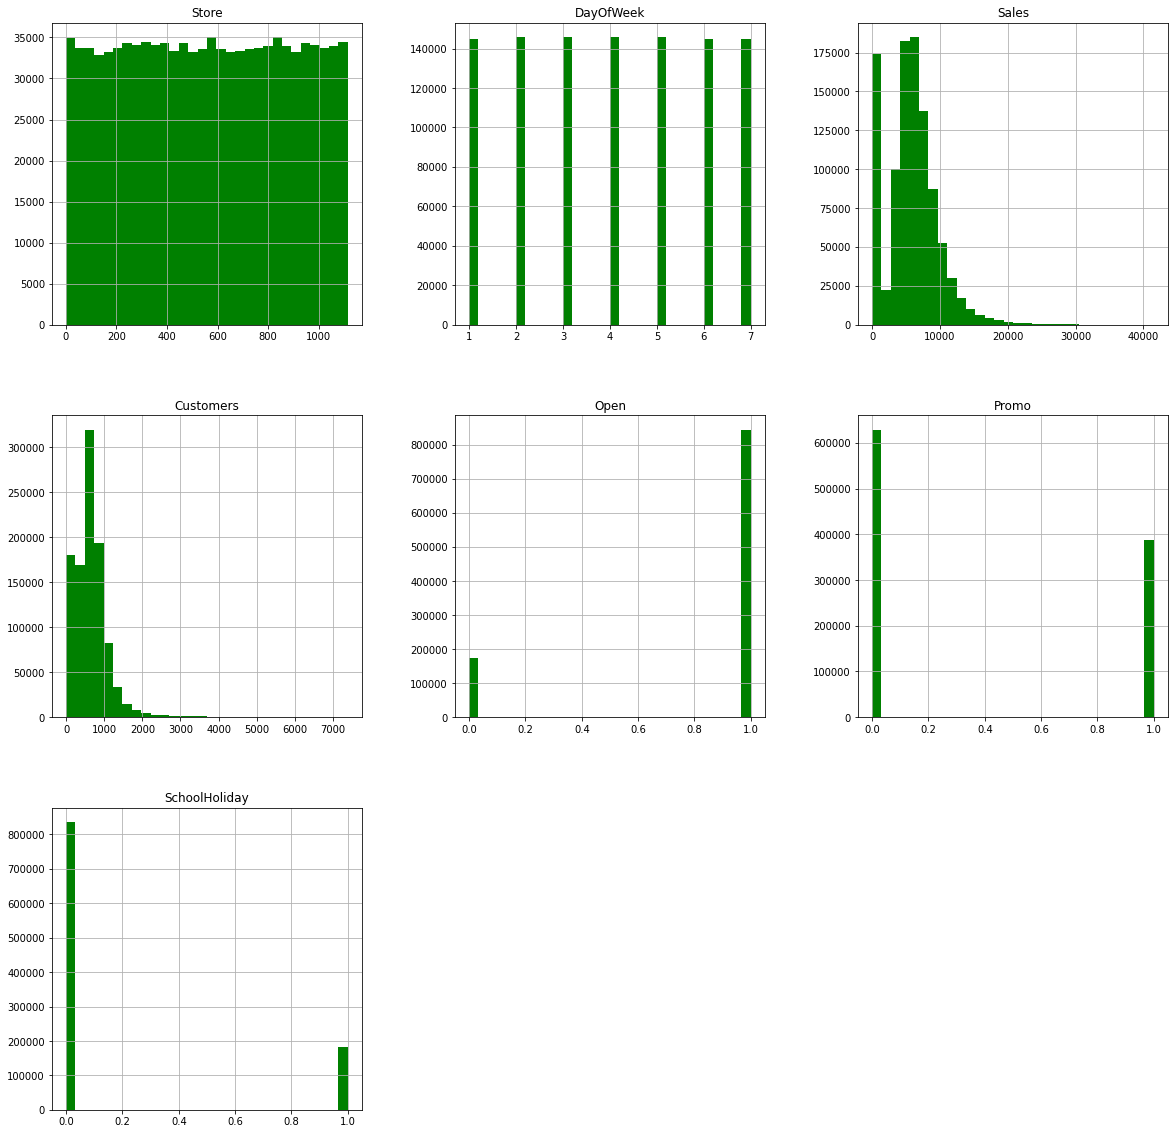

In [14]:
# Se visualiza con histogramas el comportamiento de las variables
# del dataset de ventas

sales_df.hist(bins=30, figsize=(20,20), color='g')

In [15]:
#Filtramos por ventas en tiendas abiertas y cerradas

sales_open_df = sales_df[sales_df["Open"]==1]
sales_closed_df = sales_df[sales_df["Open"]==0]

In [16]:
print("Registros totales de ventas: {}".format(len(sales_df)))
print(f"Registros de ventas con tiendas abiertas: {sales_open_df.shape[0]}")
print(f"Registros de ventas tiendas cerradas: {sales_closed_df.shape[0]}")
print(f"Porcentaje de reegistros de ventas tiendas cerradas: {(100*len(sales_closed_df)/len(sales_df)):.2f}%")

Registros totales de ventas: 1017209
Registros de ventas con tiendas abiertas: 844392
Registros de ventas tiendas cerradas: 172817
Porcentaje de reegistros de ventas tiendas cerradas: 16.99%


In [17]:
# Trabajamos solo con las tiendas abiertas 

sales_df = sales_df[sales_df["Open"]==1]

In [18]:
# Eliminamos la columna Open ya que en este momento
# no tiene sentido
sales_df.drop(["Open"], axis=1, inplace=True)

In [19]:
# Revismos nuevamente resumen estadistico con los cambios 
# ejecutados sobre el dataframe de ventas
sales_df.describe()

# El promedio de ventas incrementa a 6955 euros y el de clientes a 763

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


**Exploración dataset tiendas**

In [20]:
# Se identifica valores nulos en el dataset de tiendas

data_missing_2 = store_df.isnull()
data_missing_2.sum(axis=0)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [21]:
#Se visualiza los registros nulos para la variable CompetitionDistance
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [22]:
#Se visualiza los registros nulos para las variables CompetitionOpenSinceMonth y CompetitionOpenSinceYear
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
#Se visualiza los registros nulos para las variables Promo2SinceWeek, Promo2SinceYear  y PromoInterval
store_df[store_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
# Se reemplaza por ceros los valores nulos para las columnas CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear  y PromoInterval
store_cols = ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]

for str in store_cols:
  store_df[str].fillna(0, inplace=True)

In [25]:
# Se valida nuevamente la existenica de nulos

data_missing_2 = store_df.isnull()
data_missing_2.sum(axis=0)

# Las columnas CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear  y PromoInterval 
# ya no presentan valores nulos

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [26]:
# Para el caso de la columna CompetitionDistance
# Asignamos el valor promedio

store_df.fillna(store_df["CompetitionDistance"].mean(), inplace=True)

In [27]:
# Se valida nuevamente la existenica de nulos

data_missing_2 = store_df.isnull()
data_missing_2.sum(axis=0)

# La columna CompetitionDistance ya no presentas valores nulos

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c7ffeca50>,
      dtype=object)

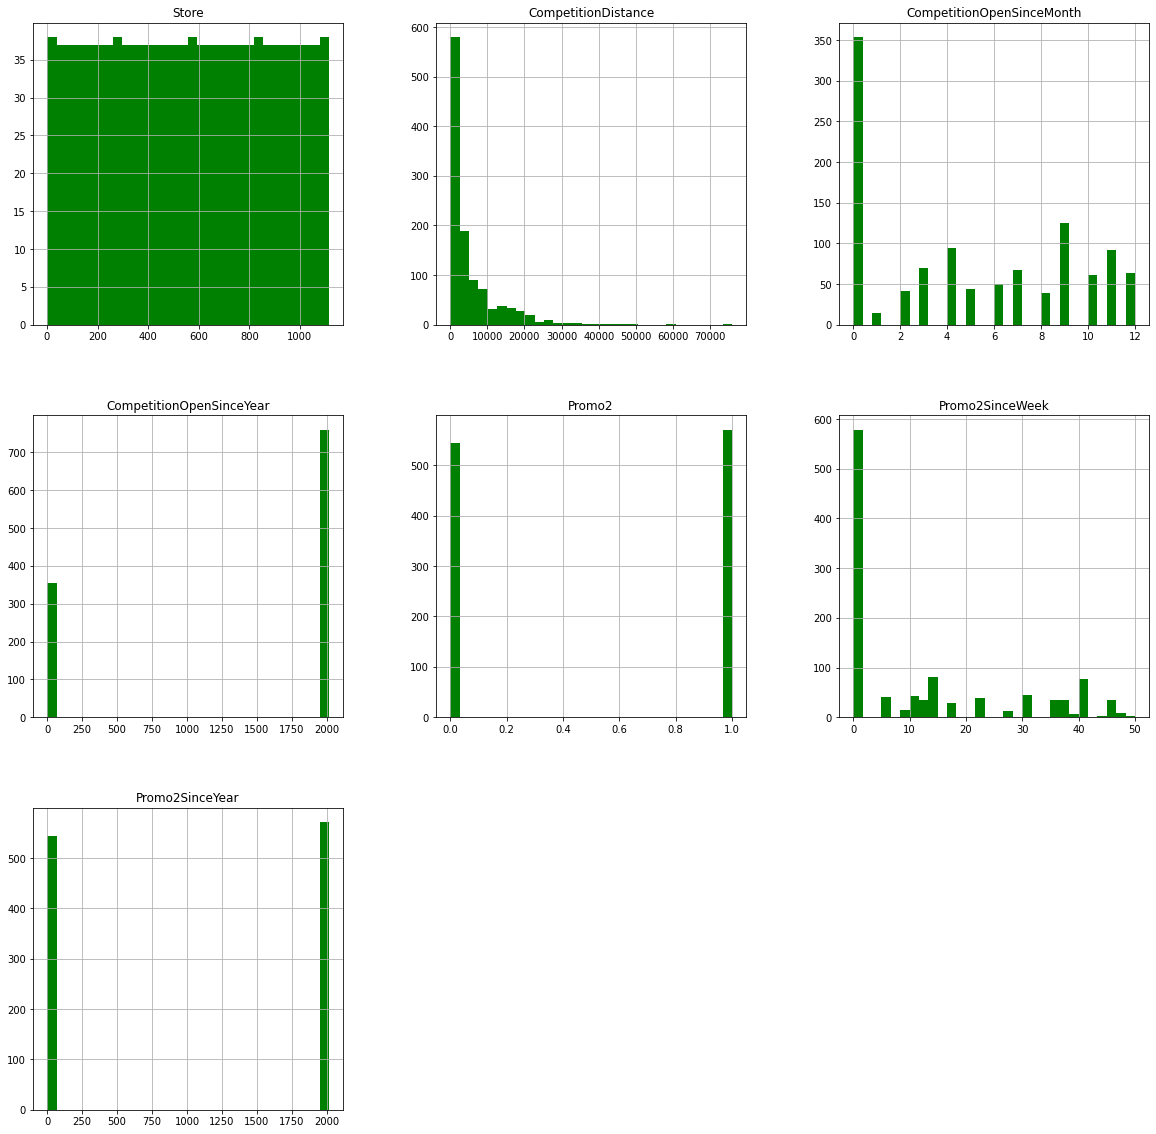

In [28]:
# Se visualiza histrograma para las variables del dataset de tiendas
store_df.hist(bins=30, figsize=(20,20), color='g')

In [29]:
# Se unen ambos dataframes, tiendas y ventas

sales_all_df = pd.merge(sales_df, store_df, how = 'inner', on = 'Store')

In [30]:
# Se guarda una copia del dataframe final
sales_all_df.to_csv('sales_all.csv', index=False)

In [31]:
sales_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [32]:
# se observan las correlaciones de acuerdo a la variable ventas

correlations = sales_all_df.corr()['Sales'].sort_values()
correlations
# los clientes y la promoción se correlacionan positivamente con las ventas
# Promo2 no parece ser efectivo en absoluto

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

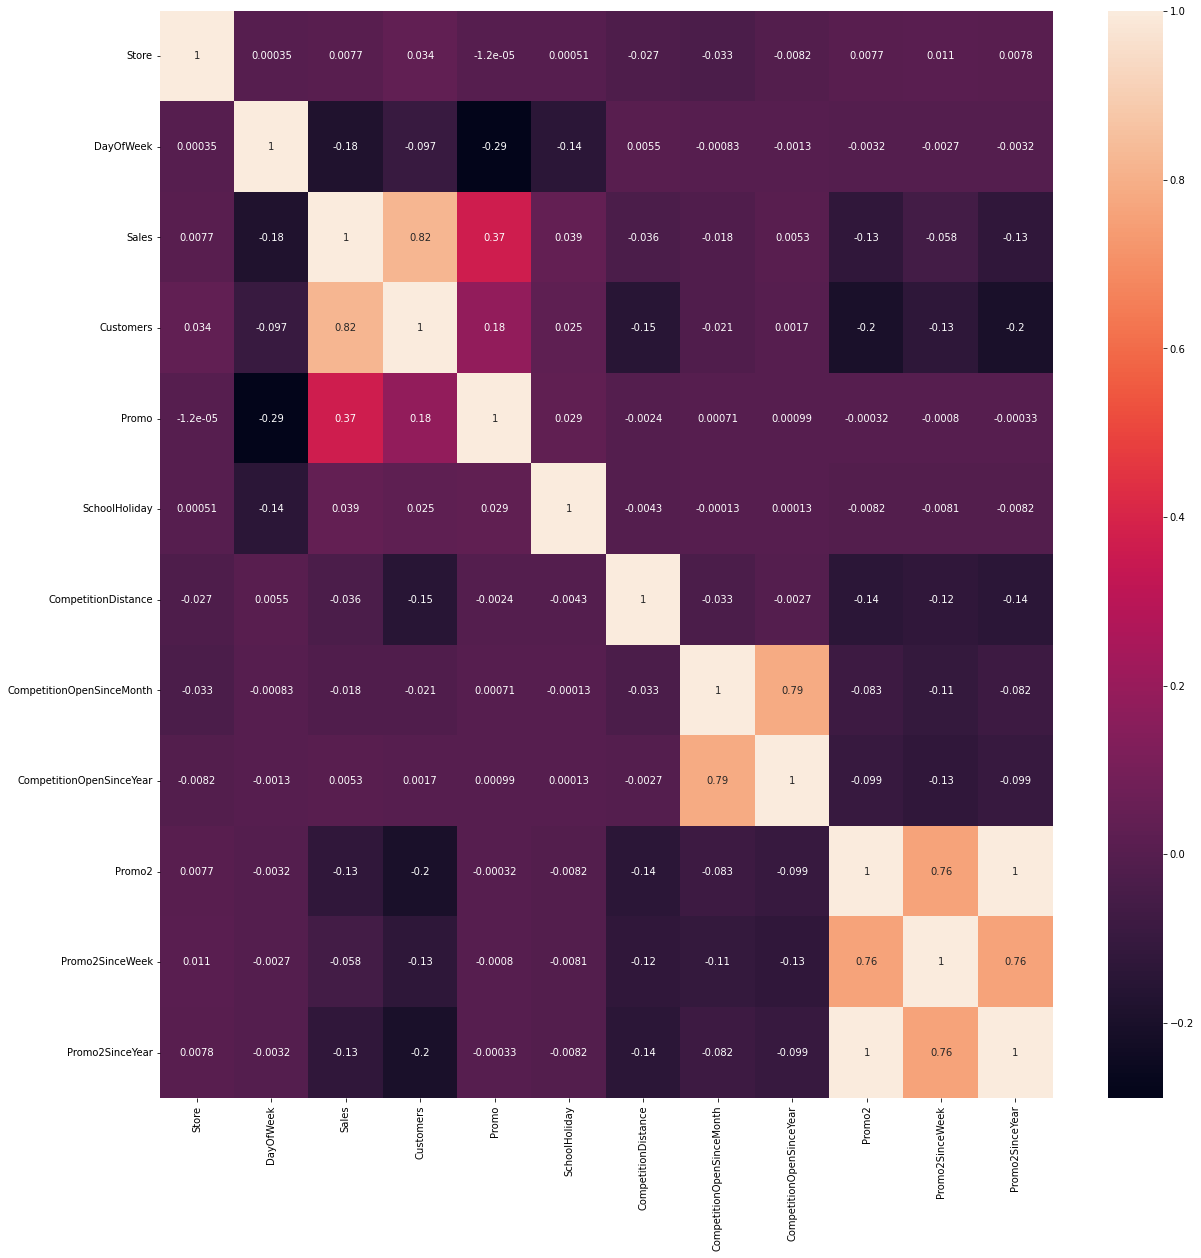

In [33]:
# Se visualiza la matriz de correlaciones

correlations = sales_all_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

# Los clientes / Promo y las ventas están fuertemente correlacionados

In [34]:
# Se separa el año día y mes en columnas independientes

sales_all_df['Year'] = pd.DatetimeIndex(sales_all_df['Date']).year
sales_all_df['Month'] = pd.DatetimeIndex(sales_all_df['Date']).month
sales_all_df['Day'] = pd.DatetimeIndex(sales_all_df['Date']).day

In [35]:
sales_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Text(0.5, 1.0, 'Clientes promedio por Mes')

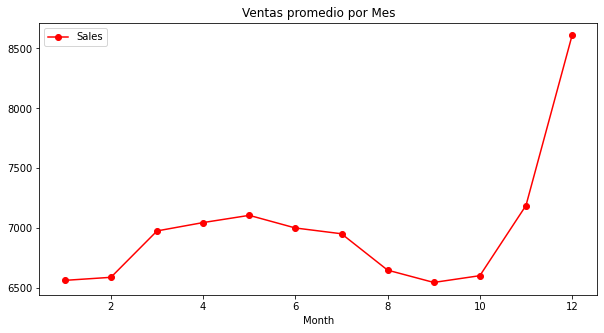

<Figure size 432x288 with 0 Axes>

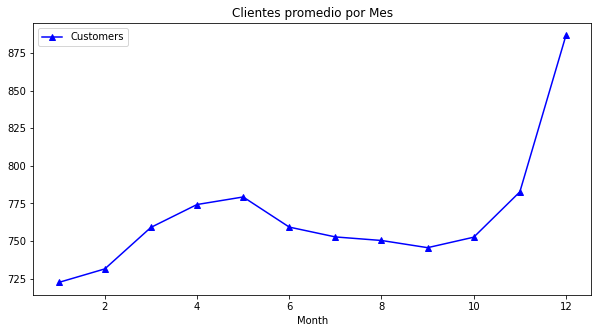

In [36]:
# Se observa las ventas promedio y la cantidad de clientes por mes.
# 'groupby' funciona muy bien al agrupar todos los datos que comparten la misma columna del mes, luego obtener la media de la columna de ventas

axis = sales_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por Mes")


plt.figure()
axis = sales_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por Mes")

# Se puede observar que ambas graficas alcanzan su punto maximo en el mes de diciembre

Text(0.5, 1.0, 'Clientes promedio por día del mes')

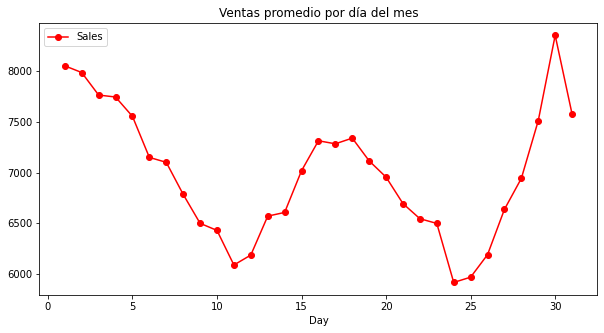

<Figure size 432x288 with 0 Axes>

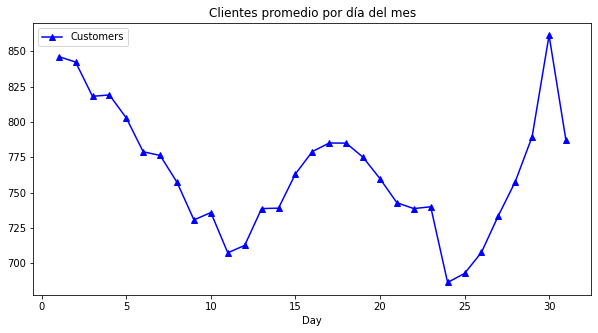

In [37]:
# Se observa las ventas y clientes promedio por día
axis = sales_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por día del mes")

plt.figure()
axis = sales_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por día del mes")

Text(0.5, 1.0, 'Clientes promedio por día de la semana')

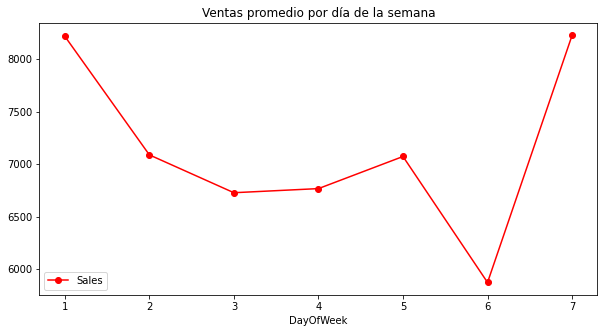

<Figure size 432x288 with 0 Axes>

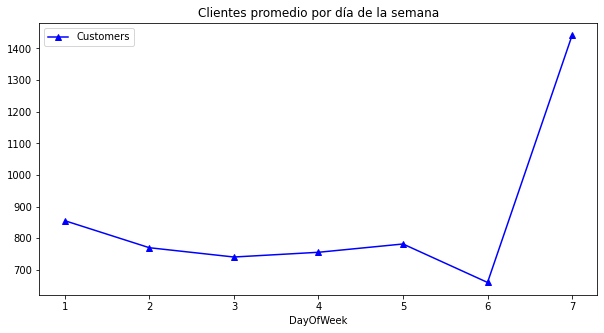

In [38]:
# Se observa las ventas y clientes promedio por día de la semana
axis = sales_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por día de la semana")

plt.figure()
axis = sales_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por día de la semana")

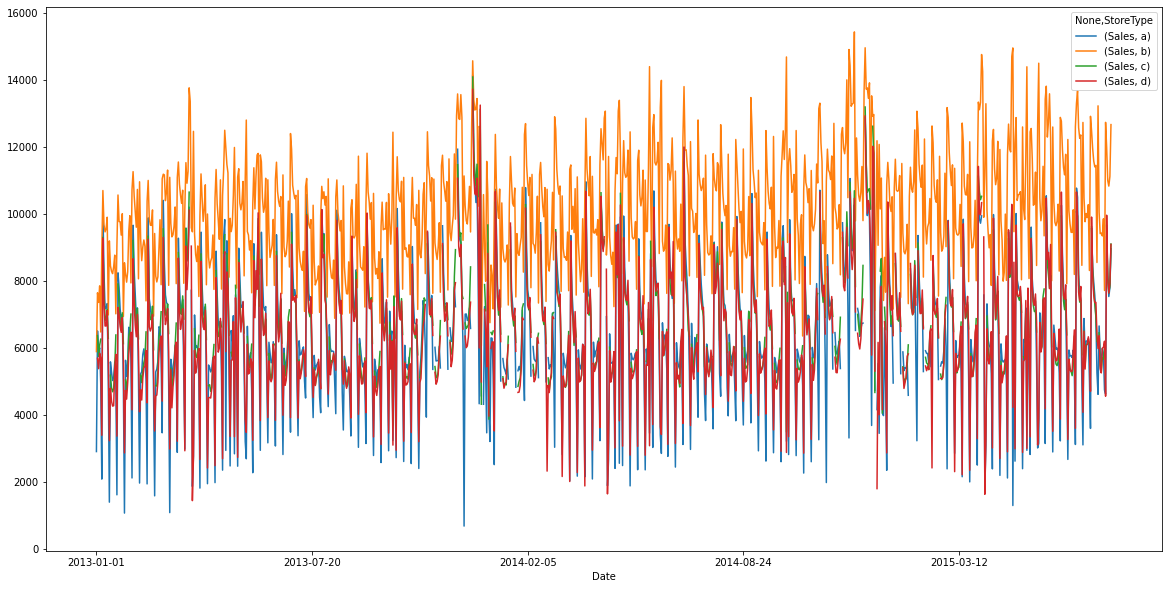

In [39]:
# Se visualiza el promedio de ventas agrupado por fecha y tipo de tienda

fig, ax = plt.subplots(figsize = (20, 10))
sales_all_df.groupby(['Date', 'StoreType'])[['Sales']].mean().unstack().plot(ax = ax)

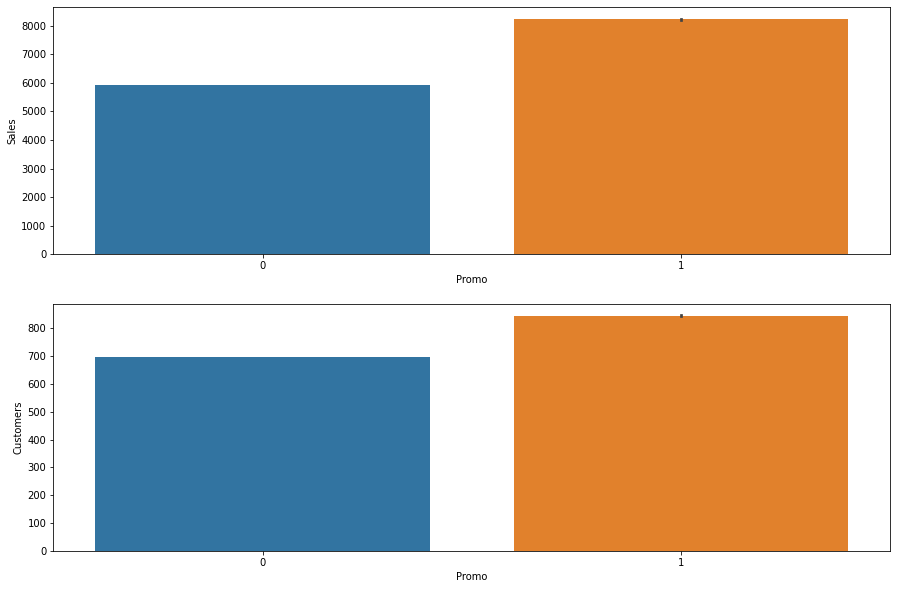

In [40]:
# Se visulizan el promedio de ventas y clientes en función de promociones
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_all_df)

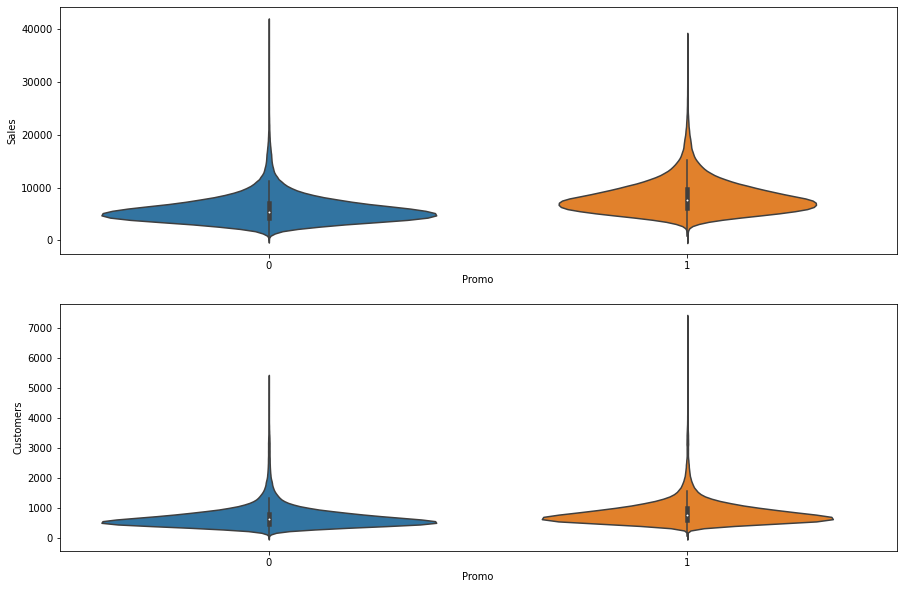

In [41]:
# Se visulizan el promedio de ventas y clientes en función de promociones
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_all_df)

## Creación y entrenamiento del Modelo con Facebook Prophet

In [42]:
# !pip install fbprophet
from fbprophet import Prophet

In [54]:
# Se define una función para las predicciones de las ventas de forma periodica

def sales_predictions(Store_ID, sales_fun_df, periods):

    sales_fun_df = sales_fun_df[sales_fun_df['Store'] == Store_ID]
    sales_fun_df = sales_fun_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_fun_df = sales_fun_df.sort_values('ds')

    model    = Prophet()
    model.fit(sales_fun_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel = 'Fechas', ylabel = 'Ventas')
    figure2  = model.plot_components(forecast)

    # return sales_df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


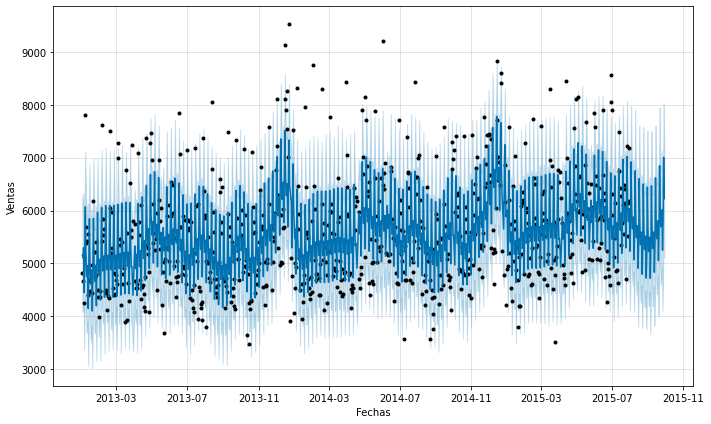

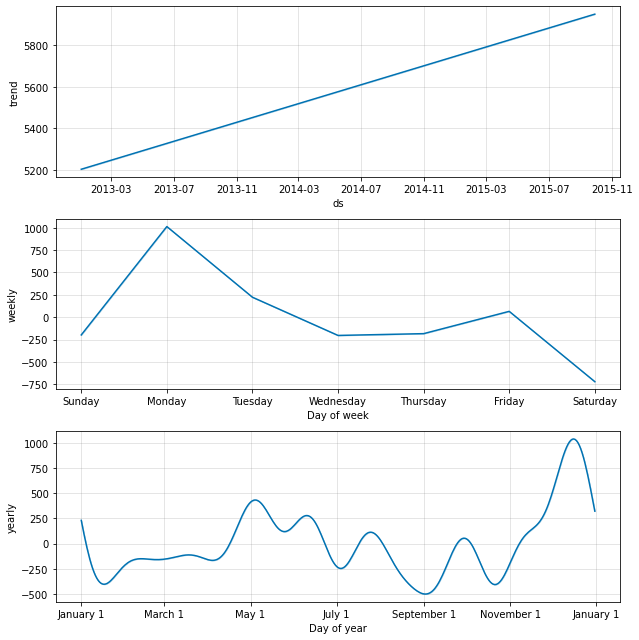

In [60]:
# Se llama la función sales_predictions obteniendo las tendencias futuras
sales_predictions(10, sales_all_df, 60)


In [91]:
# Se define una función para las predicciones de las ventas de forma periodica
# esta vez incluyendo la variable estacionaria para vacaciones

def sales_predictions_2(Store_ID, sales_fun_df, holydays, periods):

    sales_fun_df = sales_fun_df[sales_fun_df['Store'] == Store_ID]
    sales_fun_df = sales_fun_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_fun_df = sales_fun_df.sort_values('ds')

    model    = Prophet(holidays=holydays)
    model.fit(sales_fun_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel = 'Fechas', ylabel = 'Ventas')
    figure2  = model.plot_components(forecast)

In [92]:
# Se obtienen todas las fechas relacionadas con las vacaciones escolares
school_holidays = sales_all_df[sales_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [93]:
# Se obtienen las fechas unicas para las vacaciones escolares
# school_holidays = np.unique(school_holidays)
# school_holidays.shape

In [94]:
# Se obtienen todas las fechas correspondientes a los festivos estatales
state_holidays = sales_all_df[(sales_all_df['StateHoliday'] == 'a') | (sales_all_df['StateHoliday'] == 'b') | (sales_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [95]:
# Se obtienen las fechas unicas para vacaciones estatales
# state_holidays = np.unique(state_holidays)
# state_holidays.shape

In [96]:
# Se crea un dataframe para las vacaciones escolares
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 
                                'holiday': 'school_holiday'})

In [97]:
school_holidays.head()

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday


In [98]:
# Se crea un dataframe para las vacaciones estatales
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 
                                'holiday': 'state_holiday'})

In [99]:
state_holidays.head()

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday


In [100]:
# Se crea un unico dataframe concatenando ambos dataframes de vacaciones

school_state_holidays = pd.concat((state_holidays, school_holidays), axis = 0)

In [101]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


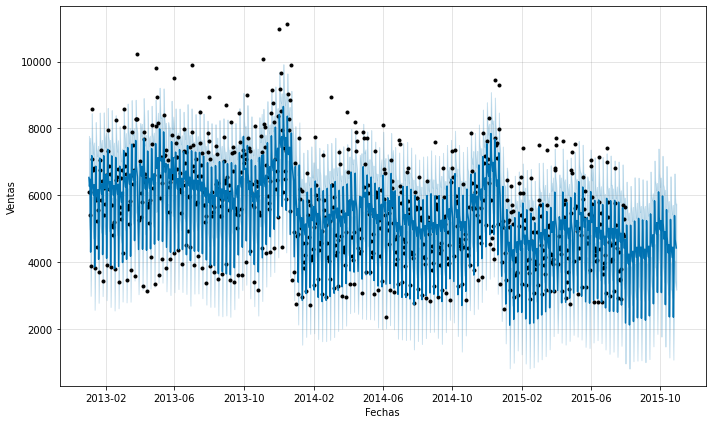

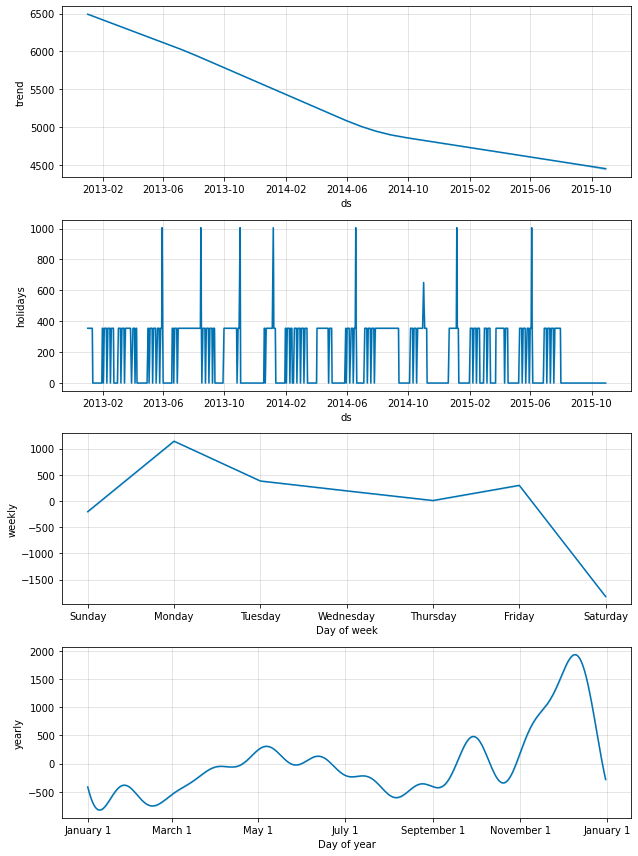

In [102]:
# Se llama la función sales_predictions obteniendo las tendencias futuras,
# incluyendo el dataframe vacaciones
sales_predictions_2(6, sales_all_df, school_state_holidays, 90)